In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/SrushtiChauhan/Test-2022/main/OCD_comments_individual.csv", 
                          on_bad_lines='skip');

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=9b4f0d3ae0b05ae0300b352c0b40e5b7792b16dec045d31011f59dde4510721c
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
df.shape

(3903, 4)

In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
my_dataframe = pysqldf("""select * from df where Comment!='[removed]' and Comment!='[deleted]' """)
my_dataframe

,ID,Comment,Comment_Created,Score
0,tx850u,Call the triage nurse from ur primary care office,2022-04-06 00:47:21,3
1,tx850u,Google it.,2022-04-05 23:52:05,1
2,tx850u,"This is a stupid question, but I’ll answer it....",2022-04-06 02:54:54,1
3,tx850u,Absolutely not man. You have to educate yours...,2022-04-06 04:03:21,1
4,tx850u,What does this mean ?,2022-04-06 00:55:01,0
...,...,...,...,...
3767,1m4eey,We would be in much closer agreement then!,2013-09-11 18:06:28,1
3768,1m4eey,yeah :D,2013-09-11 18:11:55,1
3769,1n8vrn,"Go to a doctor, not reddit.",2013-09-27 14:31:51,1
3770,1n8vrn,"Wow, is kateweb just like, MIA at this point? ...",2013-09-28 22:02:32,2


In [ ]:
my_dataframe.shape

(3772, 4)

In [ ]:
!pip install emoji

     |████████████████████████████████| 175 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4f97d104a54a7fa74fcab922c7654db0314f2b24bc2063770a4b5c217b020218
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji
import regex

def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [ ]:
my_dataframe["emojis"] = [' '.join(emoji for emoji in split_count(t)) for t in my_dataframe['Comment']]

In [ ]:
my_dataframe

,ID,Comment,Comment_Created,Score,emojis
0,tx850u,Call the triage nurse from ur primary care office,2022-04-06 00:47:21,3,
1,tx850u,Google it.,2022-04-05 23:52:05,1,
2,tx850u,"This is a stupid question, but I’ll answer it....",2022-04-06 02:54:54,1,
3,tx850u,Absolutely not man. You have to educate yours...,2022-04-06 04:03:21,1,
4,tx850u,What does this mean ?,2022-04-06 00:55:01,0,
...,...,...,...,...,...
3767,1m4eey,We would be in much closer agreement then!,2013-09-11 18:06:28,1,
3768,1m4eey,yeah :D,2013-09-11 18:11:55,1,
3769,1n8vrn,"Go to a doctor, not reddit.",2013-09-27 14:31:51,1,
3770,1n8vrn,"Wow, is kateweb just like, MIA at this point? ...",2013-09-28 22:02:32,2,


In [ ]:
my_dataframe["emojis"][0]

''

In [ ]:
my_df = pysqldf("""select * from my_dataframe where emojis!='' """)
my_df

,ID,Comment,Comment_Created,Score,emojis
0,tw6ybl,"It's your armpit???🤔\n\n\nSeriously, a simple ...",2022-04-04 17:39:12,1,🤔
1,tvxnt7,Is the window period for hiv 2 different than ...,2022-04-05 12:38:48,2,🥺
2,tvxnt7,Thanks brother 😁,2022-04-05 13:13:11,1,😁
3,tvw4jj,"That’s what I’m keep thinking abt, exactly whi...",2022-04-04 07:54:49,1,🥲
4,tvw4jj,When did you do your test after potential expo...,2022-04-04 08:08:07,1,😅
...,...,...,...,...,...
151,p48q07,❤️❤️,2021-08-14 18:16:48,1,❤️ ❤️
152,p48q07,❤️👏🏼,2021-08-20 18:30:11,1,❤️ 👏🏼
153,p2wuih,Bahaha. I’m not a dickhead - most people actua...,2021-08-13 14:53:20,1,✨ ✨
154,p1d6jz,We are in a pandemic and everyone thinks they ...,2021-08-10 02:00:24,1,🙄


In [ ]:
my_df["emojis"][0]

'🤔'

In [ ]:
emoji.demojize(my_df["Comment"][8])

'Let it go, let it go....:musical_notes::musical_note::musical_notes:'

In [ ]:
emoji.demojize(my_df["emojis"][5])

':clapping_hands_medium-dark_skin_tone:'

In [ ]:
my_df["emotions"] = [emoji.demojize(t) for t in my_df['emojis']]

In [ ]:
my_df

,ID,Comment,Comment_Created,Score,emojis,emotions
0,tw6ybl,"It's your armpit???🤔\n\n\nSeriously, a simple ...",2022-04-04 17:39:12,1,🤔,:thinking_face:
1,tvxnt7,Is the window period for hiv 2 different than ...,2022-04-05 12:38:48,2,🥺,:pleading_face:
2,tvxnt7,Thanks brother 😁,2022-04-05 13:13:11,1,😁,:beaming_face_with_smiling_eyes:
3,tvw4jj,"That’s what I’m keep thinking abt, exactly whi...",2022-04-04 07:54:49,1,🥲,:smiling_face_with_tear:
4,tvw4jj,When did you do your test after potential expo...,2022-04-04 08:08:07,1,😅,:grinning_face_with_sweat:
...,...,...,...,...,...,...
151,p48q07,❤️❤️,2021-08-14 18:16:48,1,❤️ ❤️,:red_heart: :red_heart:
152,p48q07,❤️👏🏼,2021-08-20 18:30:11,1,❤️ 👏🏼,:red_heart: :clapping_hands_medium-light_skin_...
153,p2wuih,Bahaha. I’m not a dickhead - most people actua...,2021-08-13 14:53:20,1,✨ ✨,:sparkles: :sparkles:
154,p1d6jz,We are in a pandemic and everyone thinks they ...,2021-08-10 02:00:24,1,🙄,:face_with_rolling_eyes:


In [ ]:
# Start with loading all necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
% matplotlib inline

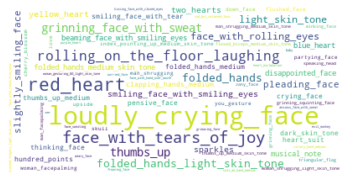

In [ ]:
data = my_df

#Creating the text variable
text = " ".join(data.emotions)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

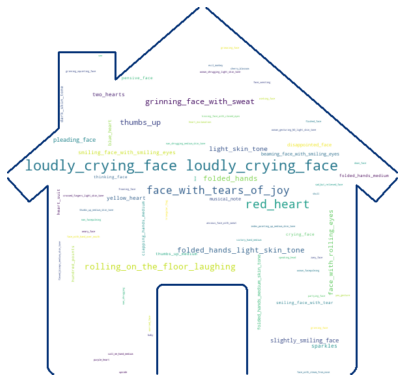

In [ ]:
#https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
#https://www.geeksforgeeks.org/generate-word-clouds-of-any-shape-in-python/
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

import requests

# Generate a word cloud image
stopwords = set(STOPWORDS)

mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

#mask = np.array(Image.open("/content/drive/My Drive/reddit.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='white', 
                      #max_words=500, 
                      mask=mask,
                      contour_color='#023075',contour_width=3
                      #,colormap='rainbow'
                      ).generate(' '.join(my_df['emotions']))
# create image as cloud
plt.figure().set_size_inches(7, 9)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

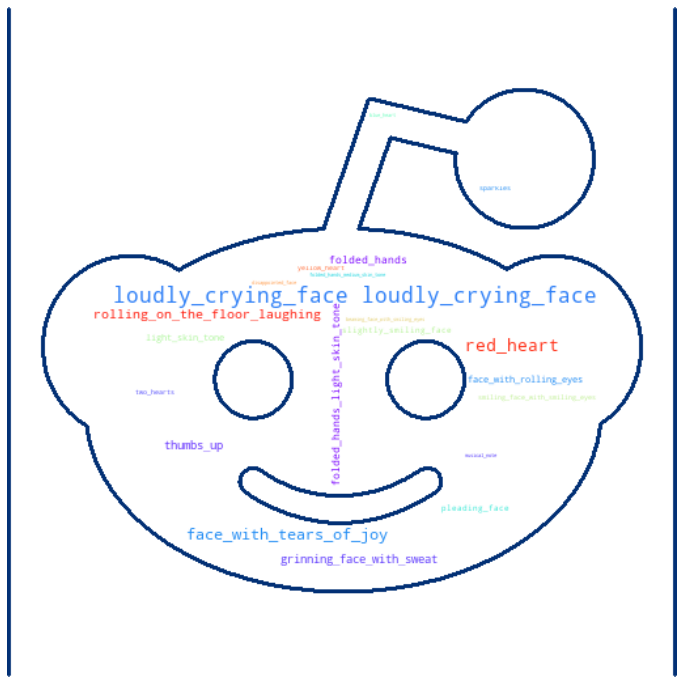

In [ ]:
mask = np.array(Image.open(requests.get('https://cdn-icons-png.flaticon.com/512/52/52191.png', stream=True).raw))

wordcloud = WordCloud(stopwords=stopwords,background_color='white', 
                      max_words=500, 
                      mask=mask,
                      contour_color='#023075',contour_width=3
                      ,colormap='rainbow'
                      ).generate(' '.join(my_df['emotions']))
# create image as cloud
plt.figure().set_size_inches(12, 15)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()

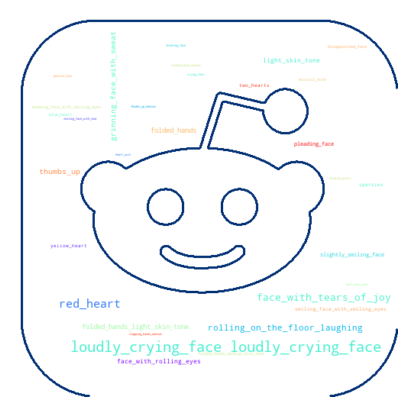

In [ ]:
mask = np.array(Image.open(requests.get('https://www.freeiconspng.com/uploads/blue-reddit-icon-8.png', stream=True).raw))

wordcloud = WordCloud(stopwords=stopwords,background_color='white', 
                      max_words=500, 
                      mask=mask,
                      contour_color='#023075',contour_width=3
                      ,colormap='rainbow'
                      ).generate(' '.join(my_df['emotions']))
# create image as cloud
plt.figure().set_size_inches(7, 9)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("cloud.png", format="png")
plt.show()